# 분석시나리오1

## <font color=blue>코로나 확진자 수 추이 VS.소비자 동향 지수 추이 (20.1월 ~ 22.5월) </font>

* 소비자 동향 지수  
매월 한국은행이 소비자의 경제상황에 대한 인식과 향후 소비지출전망 등을 조사하여 지수화한 것으로, 지수가 100보다 크면 경기 전망에 대한 긍정적 인식이 더 높다는 것을 의미(100을 기준으로 0에서 200까지 값)  
--> 소비지출전망 CSI가 100을 넘긴 것 : 앞으로 소비를 늘리겠다고 밝힌 소비자가 줄이겠다는 사람수보다 많았음을 의미  

In [1]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
# plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline

In [3]:
# df = pd.read_csv(file_name, encoding='utf-8')  # utf-8, euc-kr, cp949

# 월별 코로나 신규 확진자 수 가져오기
df_covid_data = pd.read_excel('data/data_covid.xlsx')
df_covid_data.head()

In [3]:
# 월별 소비자 동향 조사 : 가계수입전망CSI / 소비지출전망CSI
df_con_data = pd.read_excel('data/data_consumer_index.xlsx')
df_con_data.head()

,base_mm,income_CSI,con_CSI
0,2020/01,101,110
1,2020/02,97,106
2,2020/03,87,93
3,2020/04,83,87
4,2020/05,87,91


In [4]:
# 월별데이터 기준시점별 조인
df_mg = pd.merge(df_covid_data, df_con_data, on = 'base_mm')
df_mg.head()

,base_mm,covid_new,income_CSI,con_CSI
0,2020/01,0,101,110
1,2020/02,0,97,106
2,2020/03,0,87,93
3,2020/04,979,83,87
4,2020/05,703,87,91


In [5]:
len(df_covid_data), len(df_con_data), len(df_mg)

(29, 29, 29)

In [6]:
df_mg['base_ym'] = ''
df_mg.head()

,base_mm,covid_new,income_CSI,con_CSI,base_ym
0,2020/01,0,101,110,
1,2020/02,0,97,106,
2,2020/03,0,87,93,
3,2020/04,979,83,87,
4,2020/05,703,87,91,


In [7]:
for i in range(len(df_mg)):
    df_mg['base_ym'][i] = df_mg.base_mm[i][2:4]+'.'+df_mg.base_mm[i][5:7]
    

<ipython-input-7-66bd2e48b03b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mg['base_ym'][i] = df_mg.base_mm[i][2:4]+'.'+df_mg.base_mm[i][5:7]


In [8]:
df_mg.head()

,base_mm,covid_new,income_CSI,con_CSI,base_ym
0,2020/01,0,101,110,20.01
1,2020/02,0,97,106,20.02
2,2020/03,0,87,93,20.03
3,2020/04,979,83,87,20.04
4,2020/05,703,87,91,20.05


In [9]:
df_mg.set_index('base_ym', inplace=True)           
df_mg.head(10)

,base_mm,covid_new,income_CSI,con_CSI
base_ym,,,,
20.01,2020/01,0,101,110
20.02,2020/02,0,97,106
20.03,2020/03,0,87,93
20.04,2020/04,979,83,87
20.05,2020/05,703,87,91
20.06,2020/06,1334,88,93
20.07,2020/07,1506,90,95
20.08,2020/08,5642,92,99
20.09,2020/09,3865,88,92


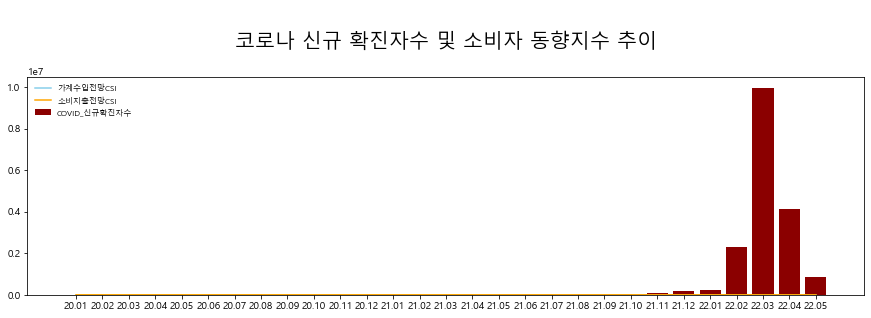

In [10]:
# 첫번째 : 그대로 그리기
fig = plt.rcParams["figure.figsize"] = [15,4]

plt.bar(df_mg.index, df_mg['covid_new'], color='darkred', width=0.8, label='COVID_신규확진자수')
plt.plot(df_mg.index, df_mg['income_CSI'], color='skyblue', label='가계수입전망CSI')
plt.plot(df_mg.index, df_mg['con_CSI'], color='orange', label='소비지출전망CSI')


plt.legend(loc='best', fontsize=8, frameon=False)
plt.title('\n 코로나 신규 확진자수 및 소비자 동향지수 추이 \n', fontsize=20)

plt.show()

<Figure size 1080x288 with 0 Axes>

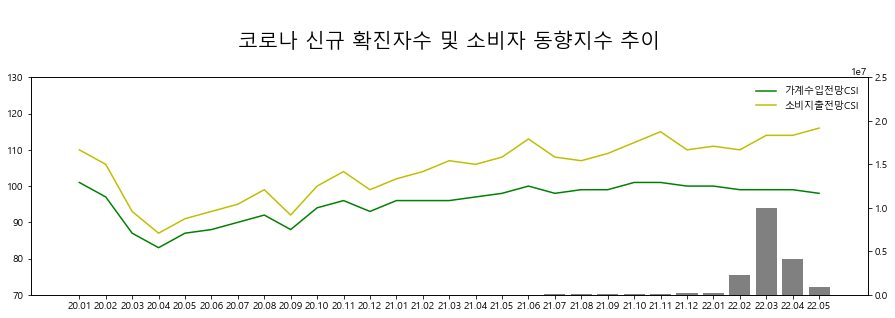

In [11]:
# 두번째 : 보조축
fig = plt.figure(figsize=(15, 4))
fig, ax1 = plt.subplots()

ax1.plot(df_mg.index, df_mg['income_CSI'], color='green', label='가계수입전망CSI')
ax1.plot(df_mg.index, df_mg['con_CSI'], color='y', label='소비지출전망CSI')
ax1.set_ylim(70, 130)

ax1.legend(loc='best', fontsize=10, frameon=False)
ax1.set_title('\n 코로나 신규 확진자수 및 소비자 동향지수 추이 \n', fontsize=20)

ax2 = ax1.twinx()
ax2.bar(df_mg.index, df_mg['covid_new'], color='grey', width=0.8, label='COVID_신규확진자수')
ax2.set_ylim(0, 25000000)

plt.show()

In [12]:
# 세번째 : 따로 그리기
df_covid = df_mg[['covid_new']]
df_covid.head()

,covid_new
base_ym,
20.01,0
20.02,0
20.03,0
20.04,979
20.05,703


In [13]:
df_con = df_mg[['income_CSI', 'con_CSI']]
df_con.head()

,income_CSI,con_CSI
base_ym,,
20.01,101,110
20.02,97,106
20.03,87,93
20.04,83,87
20.05,87,91


In [14]:
df_con['standard'] = 100
df_con.head()

<ipython-input-14-3c7a289bcacc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['standard'] = 100


,income_CSI,con_CSI,standard
base_ym,,,
20.01,101,110,100
20.02,97,106,100
20.03,87,93,100
20.04,83,87,100
20.05,87,91,100


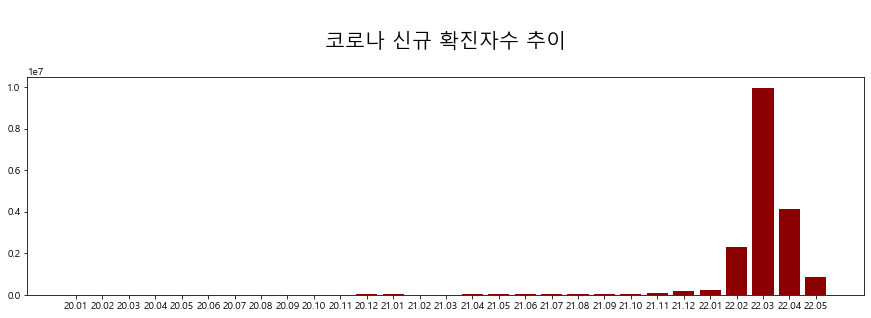

In [15]:
fig = plt.rcParams["figure.figsize"] = [15,4]

plt.bar(df_covid.index, df_mg['covid_new'], color='darkred', width=0.8, label='COVID_신규확진자수')

# plt.legend(loc='best', fontsize=8, frameon=False)
plt.title('\n 코로나 신규 확진자수 추이 \n', fontsize=20)

plt.show()

→ 20년 3월 코로나19 WHO 팬데믹 선언 이후 2022년 들어 크게 증가하기 시작하여 22년 3월 최고를 기록하고 현재 감소추세임

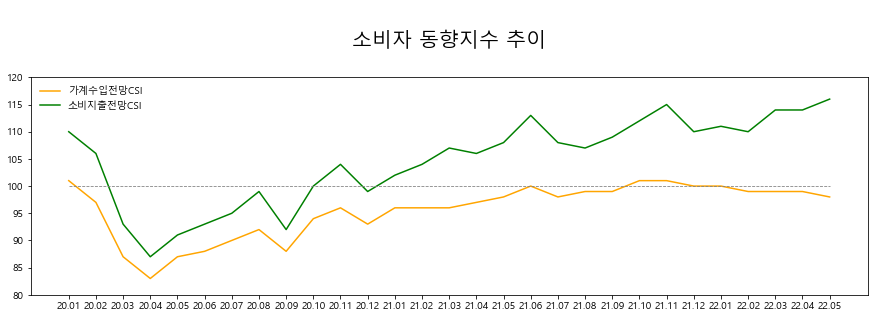

In [16]:
fig2 = plt.rcParams["figure.figsize"] = [15,4]

plt.plot(df_con.index, df_con['income_CSI'], color='orange', label='가계수입전망CSI')
plt.plot(df_con.index, df_con['con_CSI'], color='green', label='소비지출전망CSI')
plt.plot(df_con.index, df_con['standard'], color='grey', linestyle='--', linewidth = 0.8)

plt.legend(loc='best', fontsize=10, frameon=False)
plt.title('\n 소비자 동향지수 추이 \n', fontsize=20)
plt.ylim(80, 120)
plt.show()

가계수입전망CSI
* 20년 3월 코로나19 WHO 팬데믹 선언 이후 100 아래에서 등락을 반복 / 21년 10월 100을 처음 넘어섰으나 다시 감소추세 나타남  
  
소비지출전망CSI  
  - 20년 3월 코로나19 WHO 팬데믹 선언 이후 20년말까지 100 아래에서 등락을 반복 / 이후 100 이상에서 머무르며 상승추세 나타남  

→ 수입에 대한 소비자의 전망은 좀더 지켜봐야하나, 지출에 대한 소비자 전망은 긍정적임을 의미함

* (참고)소비자 동향 지수  
매월 한국은행이 소비자의 경제상황에 대한 인식과 향후 소비지출전망 등을 조사하여 지수화한 것으로, 지수가 100보다 크면 경기 전망에 대한 긍정적 인식이 더 높다는 것을 의미

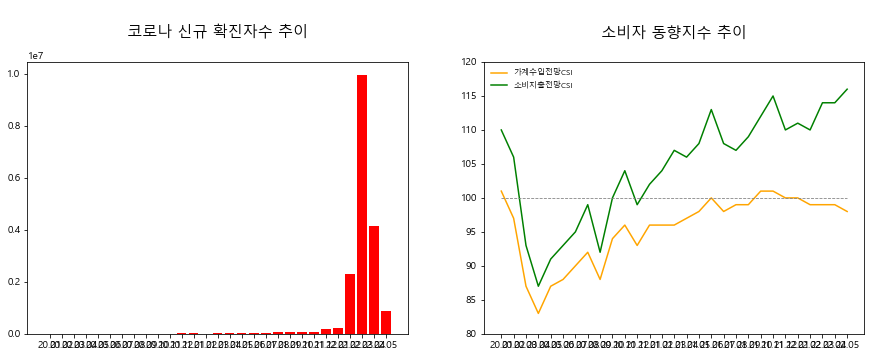

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.bar(df_covid.index, df_mg['covid_new'], color='red', width=0.8, label='COVID_신규확진자수')
plt.title('\n 코로나 신규 확진자수 추이 \n', fontsize=15)

plt.subplot(122) 
plt.plot(df_con.index, df_con['income_CSI'], color='orange', label='가계수입전망CSI')
plt.plot(df_con.index, df_con['con_CSI'], color='green', label='소비지출전망CSI')
plt.plot(df_con.index, df_con['standard'], color='grey', linestyle='--', linewidth = 0.8)

plt.legend(loc='best', fontsize=8, frameon=False)
plt.title('\n 소비자 동향지수 추이 \n', fontsize=15)
plt.ylim(80, 120)

plt.show()

In [18]:
import seaborn as sns
sns.set()

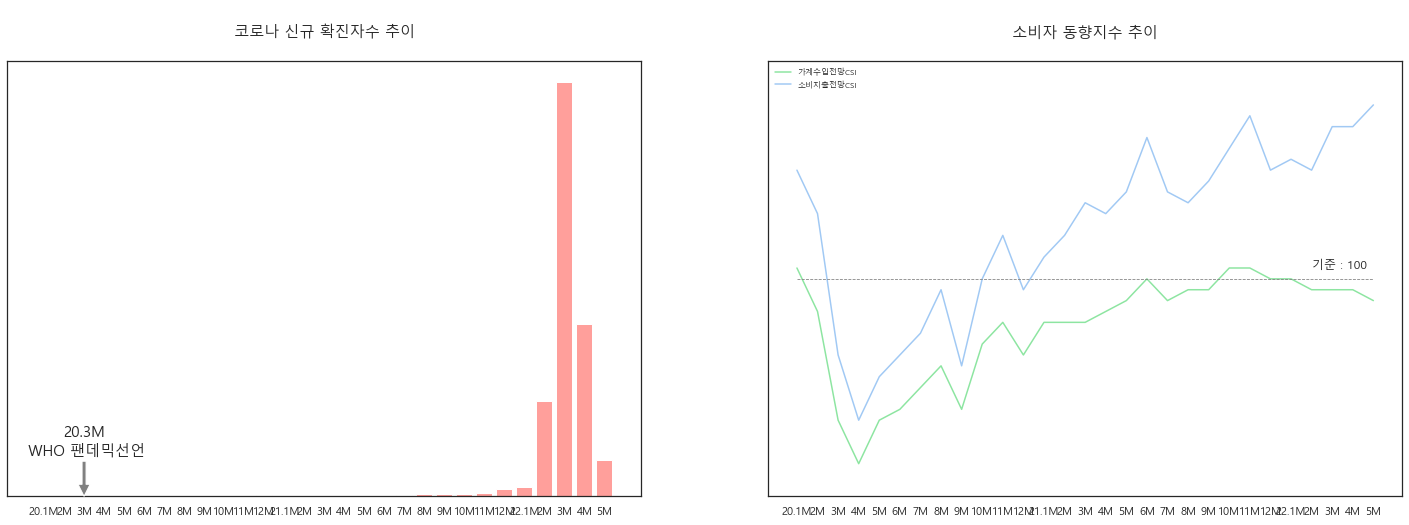

In [104]:
sns.set_color_codes("pastel")
sns.set_style("white")

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 적용
plt.figure(figsize=(25,8))

plt.subplot(121)
# plt.subplot(211)
plt.bar(df_covid.index, df_mg['covid_new'], color='r')
plt.title('\n 코로나 신규 확진자수 추이 \n', fontsize=15)
plt.xticks(df_covid.index,('20.1M','2M','3M','4M','5M','6M','7M','8M','9M','10M','11M','12M','21.1M','2M','3M','4M','5M','6M','7M','8M','9M','10M','11M','12M','22.1M','2M','3M','4M','5M'))
plt.gca().axes.yaxis.set_visible(False) #y축만 없애기

plt.annotate('20.3M\n WHO 팬데믹선언',
             fontsize = 15,
             ha = 'center',
#             va = 'bottom',
             xytext = (2.0, 1000000.0), # 텍스트 시작 위치
             xy = (2.0, 0.0),    # 화살표 끝 위치
             arrowprops = { 'facecolor' : 'grey',
                           'shrink' : 1000.})

plt.subplot(122)
# plt.subplot(212) 
plt.plot(df_con.index, df_con['income_CSI'], color='g', label='가계수입전망CSI')
plt.plot(df_con.index, df_con['con_CSI'], color='b', label='소비지출전망CSI')
plt.plot(df_con.index, df_con['standard'], color='grey', linestyle='--', linewidth = 0.8)

plt.legend(loc=2, fontsize=8, frameon=False)
plt.title('\n 소비자 동향지수 추이 \n', fontsize=15)
plt.xticks(df_covid.index,('20.1M','2M','3M','4M','5M','6M','7M','8M','9M','10M','11M','12M','21.1M','2M','3M','4M','5M','6M','7M','8M','9M','10M','11M','12M','22.1M','2M','3M','4M','5M'))
plt.gca().axes.yaxis.set_visible(False) #y축만 없애기
plt.text(25.0, 101.0, '기준 : 100')
plt.ylim(80, 120)

plt.show()

<Figure size 1800x1440 with 0 Axes>

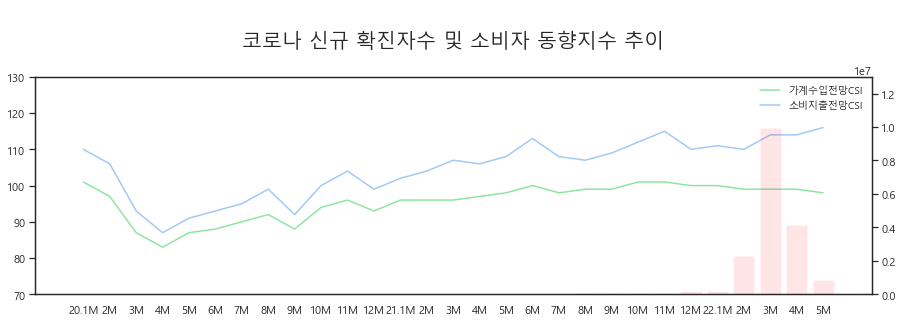

In [122]:
# 네번째 : 보조축 + 투명도
sns.set_color_codes("pastel")
sns.set_style("white")

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 적용
plt.figure(figsize=(25,10))
fig, ax1 = plt.subplots()

ax1.plot(df_mg.index, df_mg['income_CSI'], color='g', label='가계수입전망CSI')
ax1.plot(df_mg.index, df_mg['con_CSI'], color='b', label='소비지출전망CSI')
ax1.set_ylim(70, 130)

ax1.legend(loc='best', fontsize=10, frameon=False)
ax1.set_title('\n 코로나 신규 확진자수 및 소비자 동향지수 추이 \n', fontsize=20)

ax2 = ax1.twinx()
ax2.bar(df_mg.index,
        df_mg['covid_new'],
        color='red',
        alpha=0.1,
        width=0.8,
        label='COVID_신규확진자수')
ax2.set_ylim(0, 13000000)

plt.xticks(df_covid.index,('20.1M','2M','3M','4M','5M','6M','7M','8M','9M','10M','11M','12M','21.1M','2M','3M','4M','5M','6M','7M','8M','9M','10M','11M','12M','22.1M','2M','3M','4M','5M'))

plt.show()